In [16]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import confusion_matrix, accuracy_score, roc_curve, auc, f1_score
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression

''' needed this, as the file was in a different dir
import os
current_directory = os.getcwd()
print("INFO - currecnt directory is: ", current_directory)
import shutil
shutil.move("../heart.csv", "./heart.csv")
'''

# dataset source: https://www.kaggle.com/datasets/rashikrahmanpritom/heart-attack-analysis-prediction-dataset
# or: https://www.kaggle.com/code/kanncaa1/heart-attack-analysis-prediction
df = pd.read_csv('heart.csv') #assuming the .csv already in the current dir
df.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [17]:
df.describe()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [18]:
X = np.array(df.loc[ :, df.columns != 'output'])
y = np.array(df['output'])

print(f"X: {X.shape}, y: {y.shape}")

X: (303, 13), y: (303,)


In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [20]:
# Standardization - this method of scaling involves:
# subtracting the mean value from each entry and then dividing the result by the standard deviation
# .. resulting in a normal distribution of the data with a mean equal to zero and a standard deviation equal to 1
scaler = StandardScaler()
X_train_scale = scaler.fit_transform(X_train)
X_test_scale = scaler.transform(X_test) # note use of transform instead of fit_transform here on the test dataset
pd.DataFrame(X_train_scale).describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12
count,2.420000e+02,2.420000e+02,2.420000e+02,2.420000e+02,2.420000e+02,2.420000e+02,2.420000e+02,2.420000e+02,2.420000e+02,2.420000e+02,2.420000e+02,2.420000e+02,2.420000e+02
mean,-3.303143e-17,-1.761676e-16,-2.936127e-17,7.083406e-16,-2.715917e-16,2.202095e-17,-8.808381e-17,3.101284e-16,3.303143e-17,-2.202095e-16,9.725921e-17,4.771206e-17,-4.495944e-16
std,1.002073e+00,1.002073e+00,1.002073e+00,1.002073e+00,1.002073e+00,1.002073e+00,1.002073e+00,1.002073e+00,1.002073e+00,1.002073e+00,1.002073e+00,1.002073e+00,1.002073e+00
min,-2.772079e+00,-1.384075e+00,-9.718909e-01,-2.165023e+00,-2.198732e+00,-3.833007e-01,-1.046109e+00,-2.784687e+00,-6.766323e-01,-9.208640e-01,-2.343881e+00,-6.897007e-01,-3.884104e+00
25%,-7.035917e-01,-1.384075e+00,-9.718909e-01,-6.168556e-01,-6.613293e-01,-3.833007e-01,-1.046109e+00,-6.328161e-01,-6.766323e-01,-9.208640e-01,-6.949880e-01,-6.897007e-01,-5.090477e-01
50%,1.129166e-01,7.225044e-01,8.099091e-03,-2.140663e-02,-1.393717e-01,-3.833007e-01,8.431327e-01,1.741356e-01,-6.766323e-01,-1.937870e-01,-6.949880e-01,-6.897007e-01,-5.090477e-01
75%,7.116893e-01,7.225044e-01,9.880891e-01,5.740423e-01,5.296831e-01,-3.833007e-01,8.431327e-01,7.008957e-01,1.477907e+00,5.332899e-01,9.539051e-01,3.218603e-01,1.178480e+00
max,2.453574e+00,7.225044e-01,1.968079e+00,3.670377e+00,6.019728e+00,2.608918e+00,2.732374e+00,2.326007e+00,1.477907e+00,4.168675e+00,9.539051e-01,3.356544e+00,1.178480e+00


In [21]:
# neural network class
class NeuralNetworkFromScratch:
    def __init__(self, LR, X_train, y_train, X_test, y_test):
        self.w = np.random.randn(X_train.shape[1])
        self.b = np.random.randn()
        self.LR = LR # Learning Rate
        self.X_train = X_train
        self.y_train = y_train
        self.X_test = X_test
        self.y_test = y_test
        self.L_train = [] # L for Loss as in loss function
        self.L_test = []

    def activation(self, x): # sigmoid used as activation function here
        return 1 / (1 + np.exp(-x))
        # output is between 0 and 1 (hence commonly used in classification)
        # output is 0.5 when x is 0, 0 when x is -inf, 1 when x is +inf

    def dactivation(self, x): # derivative of sigmoid
        return self.activation(x) * (1 - self.activation(x))
        # multiplication rule (also known as the product rule):
        # function f(x) = u(x) * v(x), where u(x) and v(x) are both differentiable functions
        # then derivative of f(x) {denoted as f'(x)} : f'(x) = u'(x) * v(x) + u(x) * v'(x)
        # let y = e^(-x), then derivative of the sigmoid funtion is:
        # derivative of 1/(1+y), which is (using the product rule):
        # d of sigmoid is: -1 * (1+y)^-2 * dy/dx
        # using product rule as well (and d of e^x is e^x): dy/dx = e^(-x) * (-1)
        # d of sigmoid is then: -1 * (1+y)^-2 * e^(-x) * (-1)
        # which is: (1+y)^-2 * e^(-x) = (1+y)^-2 * y = (1/(1+y)) * (y/(1+y))
        # = (1/(1+y)) * ((1+y-1)/(1+y)) = (1/(1+y)) * (1 - 1/(1+y))
        # = Sigmoid(x) * (1 - Sigmoid(x))
        # = self.activation(x) * (1 - self.activation(x)) above

    def forward(self, X):
        hidden_1 = np.dot(X, self.w) + self.b
        activate_1 = self.activation(hidden_1)
        return activate_1

    def backward(self, X, y_true):
        # calc gradients
        hidden_1 = np.dot(X, self.w) + self.b
        y_pred = self.forward(X)
        dL_dpred = 2 * (y_pred - y_true)
        dpred_dhidden1 = self.dactivation(hidden_1)
        dhidden1_db = 1
        dhidden1_dw = X
        # using chain rule below
        dL_db = dL_dpred * dpred_dhidden1 * dhidden1_db
        dL_dw = dL_dpred * dpred_dhidden1 * dhidden1_dw
        return dL_db, dL_dw

    def optimizer(self, dL_db, dL_dw): # Stochastic Gradient Descent (SGD)
        # update weights
        self.b = self.b - dL_db * self.LR
        self.w = self.w - dL_dw * self.LR

    def train(self, ITERATIONS):
        for i in range(ITERATIONS):
            # random position - getting a random sample of training data
            random_pos = np.random.randint(len(self.X_train))
            #note extreme case of using 1 sample in each iteration/epoch here

            # forward pass
            y_train_true = self.y_train[random_pos]
            y_train_pred = self.forward(self.X_train[random_pos])

            # calc training loss
            # np.sum below not needed, but needed when >1 sample above
            L = np.sum(np.square(y_train_pred - y_train_true))
            self.L_train.append(L)

            # calc gradients
            dL_db, dL_dw = self.backward(
                self.X_train[random_pos], self.y_train[random_pos]
            )
            # update weights
            self.optimizer(dL_db, dL_dw)

            # calc error at every epoch end
            L_sum = 0
            for j in range(len(self.X_test)):
                y_true = self.y_test[j]
                y_pred = self.forward(self.X_test[j])
                L_sum += np.square(y_pred - y_true)
            self.L_test.append(L_sum)

        return "training successfully finished"

In [22]:
# hyper-parameters
LR = 0.1
ITERATIONS = 1000

In [23]:
# model instance and training
nn = NeuralNetworkFromScratch(LR=LR, X_train=X_train_scale, y_train=y_train, X_test=X_test_scale, y_test=y_test)
nn.train(ITERATIONS=ITERATIONS)

'training successfully finished'

<Axes: >

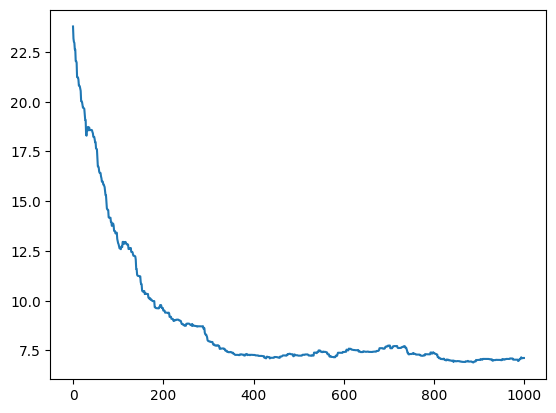

In [24]:
# check losses
sns.lineplot(x=list(range(len(nn.L_test))), y=nn.L_test)

In [25]:
# iterate over test data
total = X_test_scale.shape[0]
correct = 0
y_preds = []
for i in range(total):
    y_true = y_test[i]
    y_pred = np.round(nn.forward(X_test_scale[i]))
    y_preds.append(y_pred)
    correct += 1 if y_true == y_pred else 0

In [26]:
# Accuracy
acc = correct / total
print(acc)

0.8524590163934426


In [27]:
# Baseline Classifier - like to check if 90% are labelled positive, then just predict everything positive will result in 90% accuracy anyway
from collections import Counter
Counter(y_test)

Counter({np.int64(0): 29, np.int64(1): 32})

In [28]:
# Confusion Matrix
# https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html
# from link above:
# By definition a confusion matrix C is such that
# Ci,j is equal to the number of observations known to be in group i and predicted to be in group j
# Thus in binary classification, the count of true negatives is C[0,0], false negatives is C[1,0]
# true positives is C[1,1] and false positives is C[0,1]

confusion_matrix(y_true = y_test, y_pred = y_preds)

# https://scikit-learn.org/stable/modules/generated/sklearn.metrics.ConfusionMatrixDisplay.html
# from diagram above: 1st row is True label for Negative, 2nd row is True label for Positive
# .. and 1st column Predicted label for Negative, 2nd column is Predicted label for Positive

array([[25,  4],
       [ 5, 27]])

In [29]:
# F1 score - harmonic mean of precision and recall
#          - useful for imbalanced data
#          - balances the importance of both metrics
#          - range from 0 to 1
# When precision and recall both have perfect scores of 1.0, F1 will also have a perfect score of 1.0
# Precision - True Positives / (True Positives + False Positives)
# Recall - True Positives / (True Positives + False Negatives)

f1 = f1_score(y_true = y_test, y_pred = y_preds)
print(f"F1 score: {f1}")

F1 score: 0.8571428571428571


In [30]:
'''
now, time to try Logistic Regression
with one-hot encoding on categorical variable/s in other datasets that need such pre-processing
https://www.geeksforgeeks.org/ml-one-hot-encoding/
"
Best Practices for One Hot Encoding
To make the most of One Hot Encoding and we must consider the following best practices:

Limit the Number of Categories: If you have high cardinality categorical variables consider limiting the number of categories through grouping or feature engineering.
Use Feature Selection: Implement feature selection techniques to identify and retain only the most relevant features after One Hot Encoding. This can help reduce dimensionality and improve model performance.
Monitor Model Performance: Regularly evaluate your model’s performance after applying One Hot Encoding. If you notice signs of overfitting or other issues consider alternative encoding methods.
Understand Your Data: Before applying One Hot Encoding take the time to understand the nature of your categorical variables. Determine whether they have a natural order and whether One Hot Encoding is appropriate.
"
'''